In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('netflixData.csv')

In [3]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [4]:
df.shape

(5967, 13)

In [5]:
df.isna().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

## First, we will be building a recommendation system based on ;Cosine Distance.

#### we need these columns at first: "Title", "Description", "Genres", 'Rating', "Content Type", 'Imdb Score'

In [6]:
df = df[['Title', 'Description', 'Genres', 'Rating', 'Content Type', 'Imdb Score']]

In [7]:
df.head()

,Title,Description,Genres,Rating,Content Type,Imdb Score
0,(Un)Well,This docuseries takes a deep dive into the luc...,Reality TV,TV-MA,TV Show,6.6/10
1,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers",TV-MA,Movie,6.2/10
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies",TV-14,Movie,6.4/10
3,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,TV-MA,TV Show,6.6/10
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,"Documentaries, International Movies",TV-14,Movie,5.1/10


In [8]:
df.isna().sum()

Title             0
Description       0
Genres            0
Rating            4
Content Type      0
Imdb Score      608
dtype: int64

In [9]:
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
df.shape

(5359, 6)

In [11]:
#df.Title.value_counts()

In [12]:
import pandas as pd
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['Title'].apply(detect_language)
df = df[df['language'] == 'en']

In [13]:
df.shape

(3008, 7)

In [14]:
df['Imdb Score'] = df['Imdb Score'].str.split('/').str[0].astype(float)

In [15]:
df = df.drop(columns=['Rating','Content Type','language'])
df = df[~df['Title'].str.startswith('#')]

In [16]:
df = df.reset_index(drop=True)

#### then we need to vectorize descriptions since we are going to build a cosine distance cmputing system.

In [17]:
df.head()

,Title,Description,Genres,Imdb Score
0,10 Days in Sun City,After his girlfriend wins the Miss Nigeria pag...,"Comedies, International Movies, Romantic Movies",5.1
1,100 Days My Prince,"Upon losing his memory, a crown prince encount...","International TV Shows, Romantic TV Shows, TV ...",7.5
2,100 Things to do Before High School,"Led by seventh-grader C.J., three students who...",Movies,6.5
3,13 Reasons Why,"After a teenage girl's perplexing suicide, a c...","Crime TV Shows, TV Dramas, TV Mysteries",7.5
4,13 Reasons Why: Beyond the Reasons,"Cast members, writers, producers and mental he...","Crime TV Shows, Docuseries",7.7


In [18]:
df = df.reset_index(drop=True)

In [19]:
import neattext.functions as nfx
import re

pattern = r"\&\#[0-9]+\;"

def clean(text):
    text = nfx.clean_text(text)
    text = nfx.normalize(text)
    text = nfx.remove_userhandles(text)
    text = re.sub(r'\n', '', text)  # newline characters \n
    text = re.sub(r'\r', '', text)  # return characters \r
    text = re.sub(r'[^\w\s]', '', text) #remove punctuations 
    text = re.sub(pattern, "", text, flags=re.IGNORECASE)
    return text

df['Description'] = df['Description'].map(clean)
df['Genres'] = df['Genres'].map(clean)

In [20]:
df.head()

,Title,Description,Genres,Imdb Score
0,10 Days in Sun City,girlfriend wins miss nigeria pageant young man...,comedies international movies romantic movies,5.1
1,100 Days My Prince,losing memory crown prince encounters commoner...,international tv shows romantic tv shows tv dr...,7.5
2,100 Things to do Before High School,led seventhgrader cj students warned dangers h...,movies,6.5
3,13 Reasons Why,teenage girls perplexing suicide classmate rec...,crime tv shows tv dramas tv mysteries,7.5
4,13 Reasons Why: Beyond the Reasons,cast members writers producers mental health p...,crime tv shows docuseries,7.7


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vect.fit_transform(df['Description'])

In [22]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)

In [23]:
df = pd.concat([df, tfidf_df], axis=1)

In [24]:
df.shape

(3006, 11491)

In [25]:
film_ids = {}

df['Id'] = df['Title'].apply(lambda x: film_ids.setdefault(x, len(film_ids)))

In [26]:
df.head(1)

,Title,Description,Genres,Imdb Score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,101

In [27]:
df.shape

(3006, 11492)

In [28]:
df = df.rename(columns={'Imdb Score': 'Ratings'})

### Calculating Ratings Statistics and adding back to df

In [29]:
unique_movie_ids = df['Id'].unique()

# Loop through the unique movie IDs and calculate the size and mean of the ratings
for movie_id in unique_movie_ids:
    movie_ratings = df.loc[df['Id'] == movie_id, 'Ratings']
    ratings_size = movie_ratings.size
    ratings_mean = movie_ratings.mean()
    
    # Add the calculated values to the existing DataFrame
    df.loc[df['Id'] == movie_id, 'ratings_size'] = ratings_size
    df.loc[df['Id'] == movie_id, 'ratings_mean'] = ratings_mean

### A dictionary called movie_dict is initialized to store information about each movie.

In [30]:
movie_dict = {}

for index, row in df.iterrows():
    Movie_Id = row['Id']
    name = row['Title']
    description = row.iloc[5:3730].tolist()

    # Assuming Ratings contains numeric columns like 'size' and 'mean'
    size = row['ratings_size']  
    mean = row['ratings_mean']  

    movie_dict[Movie_Id] = [name, description, size, mean] 


In [31]:
from scipy import spatial 

def compute_distance(a,b): # a represents the 1st film and b represents the 2nd film
    description_distance=spatial.distance.cosine(a[1],b[1])   
    
    popularity_distance=abs(a[2]-b[2]) 
    
    return description_distance+popularity_distance

In [32]:
compute_distance(movie_dict[336],movie_dict[21])

1.0

In [34]:
movie_ids = [21, 407, 124, 216, 140 , 172, 166, 165, 144, 150, 334,335, 336]

distances = []
for i in range(len(movie_ids)): #first loop iterates through the list of product ids
    for j in range(i+1, len(movie_ids)): #second loop gets every id of that list
        
        product_a = movie_dict[movie_ids[i]]
        product_b = movie_dict[movie_ids[j]]
        
        distance = compute_distance(product_a, product_b)
        distances.append((movie_ids[i], movie_ids[j], distance))

In [35]:
distances.sort(key=lambda x: x[2])

best_matches = distances[:10]

for product_id_a, product_id_b, distance in best_matches:
    print(f"Movie {movie_dict[product_id_a][0]} and Movie {movie_dict[product_id_b][0]} have a distance of {distance:.2f}")

Movie Cedric the Entertainer: Live from the Ville and Movie Alex Fernández: The Best Comedian in the World have a distance of 0.91
Movie 72 Dangerous Places to Live and Movie Cedric the Entertainer: Live from the Ville have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie Alex Fernández: The Best Comedian in the World have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie Atypical have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie All the Freckles in the World have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie An Egyptian Story have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie American Woman have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie American Vandal have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie Almost Happy have a distance of 1.00
Movie 72 Dangerous Places to Live and Movie Amend: The Fight for America have a distance of 1.00


In [36]:
for product_id_a, product_id_b, distance in best_matches:
    print(f"Movie {product_id_a} and Movie {product_id_b} have a distance of {distance:.2f}")

Movie 407 and Movie 124 have a distance of 0.91
Movie 21 and Movie 407 have a distance of 1.00
Movie 21 and Movie 124 have a distance of 1.00
Movie 21 and Movie 216 have a distance of 1.00
Movie 21 and Movie 140 have a distance of 1.00
Movie 21 and Movie 172 have a distance of 1.00
Movie 21 and Movie 166 have a distance of 1.00
Movie 21 and Movie 165 have a distance of 1.00
Movie 21 and Movie 144 have a distance of 1.00
Movie 21 and Movie 150 have a distance of 1.00


In [42]:
genre_values = df.loc[df['Title'] == '72 Dangerous Places to Live', 'Genres'].tolist()
print(genre_values)

['docuseries international tv shows science  nature tv']


In [43]:
genre_values = df.loc[df['Title'] == 'Amend: The Fight for America', 'Genres'].tolist()
print(genre_values)

['docuseries']


In [41]:
Id = df.loc[df['Id'] == 21, 'Title'].tolist()
print(Id)

['72 Dangerous Places to Live']


In [ ]:
def get_top_correlated_movies(movie_dict, input_movie_id, top_n=10):
    # Ensure the input movie exists in the dictionary
    if input_movie_id not in movie_dict:
        print(f"Movie with ID {input_movie_id} not found.")
        return []

    input_movie = movie_dict[input_movie_id]
    distances = []

    # Calculate the distance between the input movie and all other movies
    for movie_id, movie_info in movie_dict.items():
        if movie_id != input_movie_id:  # Avoid comparing the movie with itself
            distance = compute_distance(input_movie, movie_info)
            distances.append((movie_id, distance))
    
    # Sort by distance and get the top N closest movies
    distances.sort(key=lambda x: x[1])
    top_correlated_movies = distances[:top_n]
    
    return top_correlated_movies

# Example: Get top 10 unique correlated movies for a given movie ID
input_movie_id = 21  # Example movie ID
top_correlated_movies = get_top_correlated_movies(movie_dict, input_movie_id, top_n=10)

for movie_id, distance in top_correlated_movies:
    print(f"Movie {movie_id} has a distance of {distance:.2f} from Movie {input_movie_id}")
    
print('')

for movie_id, distance in top_correlated_movies:
    print(f"Movie {movie_dict[movie_id][0]} and Movie {movie_dict[input_movie_id][0]} have a distance of {distance:.10f}")

# We can safely say that our system works and calculates the distances well, we can give movie_ids above in the loop and get the correlations.

### now lets build a system that can be integrated to streamlit and on the website when we choose two of whole films, it gives the correlation.

In [44]:
import pickle

In [45]:
with open('movie_dict.pkl', 'wb') as f:
    pickle.dump(movie_dict, f)

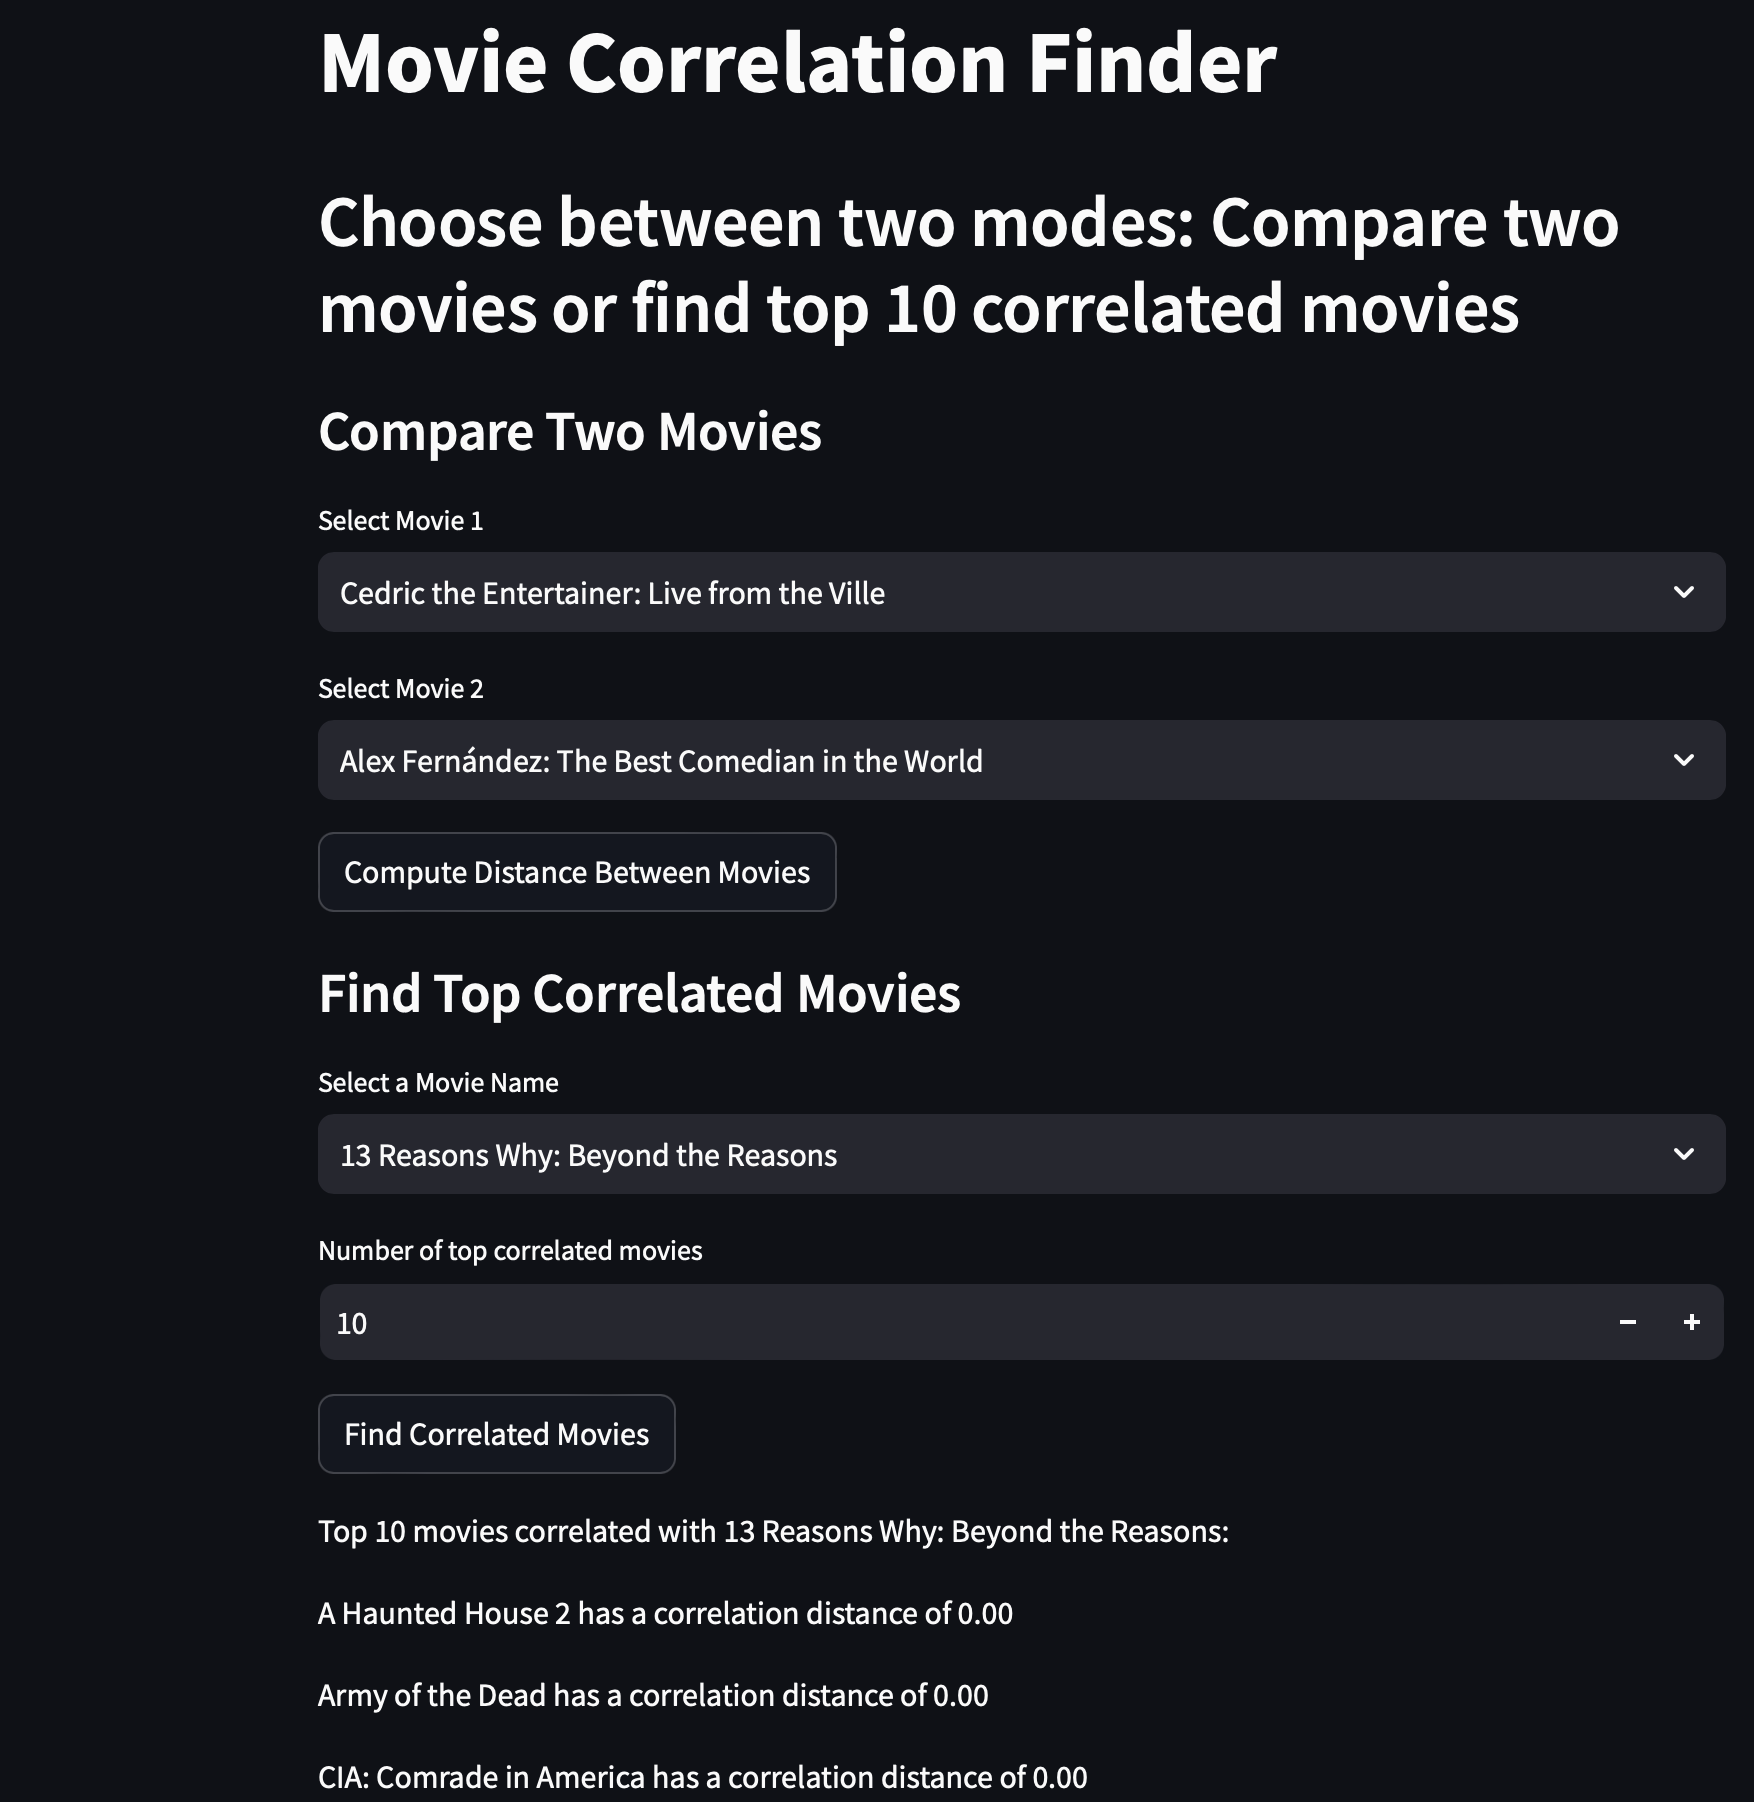

In [51]:
from PIL import Image
Image.open("/Users/yavuzalpdemirci/Desktop/screenshots/Screenshot 2024-08-16 at 13.10.31.png")

# As we can see here that our system works as intended on the website.